In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from nuvem.ANA.api import ana
from nuvem.calculos import curva_chave

In [2]:
posto = 58235100
serie = ana.obter_vazoes(posto)
cotas = ana.obter_cotas(posto)

In [3]:
# fixando as medições de cota a um horário fixo de 7 horas da manhã
cotas = cotas[cotas.index.hour == 7]
cotas = cotas.resample("D").mean()

cotas_vazoes = cotas.merge(serie.vazoes, right_index = True, left_index = True)
cotas_vazoes.dropna(axis = 0, how = 'any', inplace = True)

dados_cchave = cotas_vazoes.set_index('cota')
dados_cchave.sort_index(inplace = True)

In [4]:
cotas = dados_cchave.index
vazoes = dados_cchave.vazoes

curva, coefs = curva_chave(cotas, vazoes) 

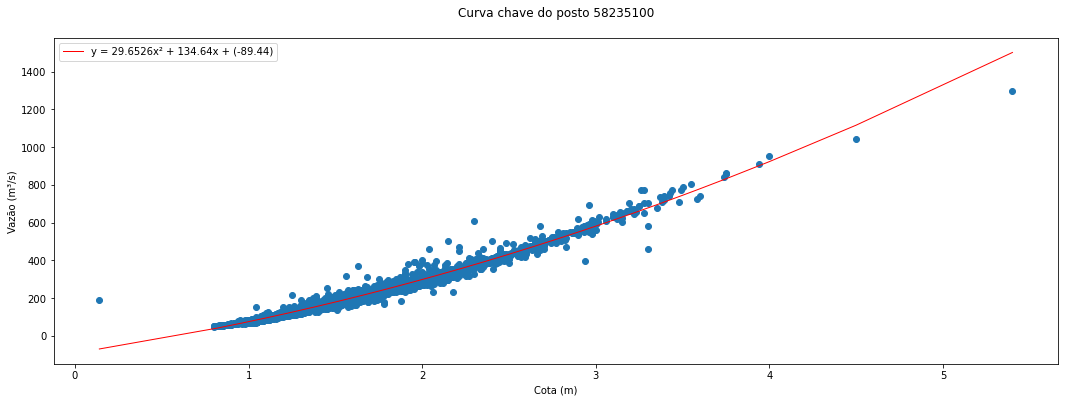

In [5]:
fig, ax = plt.subplots(figsize=(18, 6))

label='y = {:.4f}x² + {:.2f}x + ({:.2f})'.format(coefs[0], coefs[1], coefs[2])

ax.scatter(cotas, vazoes)
ax.plot(cotas, curva, color = 'red', lw=1, label = label)

ax.set_ylabel("Vazão (m³/s)")
ax.set_xlabel("Cota (m)")
ax.set_title(f"Curva chave do posto {posto}\n")
ax.legend()

plt.savefig("exemplos/curva_chave.png", facecolor='white',)